#**Loan Application Status Prediction**

#**Project Description**

---

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

#**Importing Required Libraries**

In [98]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

#**Load the Data**

In [99]:
# Load the dataset into df variable >>
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

# Exlclude ID Column not required >>
df.drop(['Loan_ID'],axis=1,inplace=True)

#**Explore the Data**

In [100]:
# Make all columns & rows of dataset as max to display >>
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lets look at top  Rows of Dataset >>
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
# Check the Shape of train Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  614
[$] Columns Of Dataset >>  12


In [102]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [103]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  149
----------------------------------------------------------------------


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
# Get statistical distribution of the dataset >>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#**Data Cleaning**

In [105]:
# Getting categorical & Numerical feauters >>
Categorical_columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['number']).columns

In [106]:
print("[$] Categorical Columns >> ",Categorical_columns.tolist())
print("[$] Numerical Columns >> ",Numerical_Columns.tolist())

[$] Categorical Columns >>  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
[$] Numerical Columns >>  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [107]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[Numerical_Columns] = numeric_imputer.fit_transform(df[Numerical_Columns])

# Impute missing values in categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[Categorical_columns] = categorical_imputer.fit_transform(df[Categorical_columns])

In [108]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())
print("-"*70)
df.isnull().sum()

[$] Null Values >>  0
----------------------------------------------------------------------


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


#**EDA**

<AxesSubplot:ylabel='Loan_Status'>

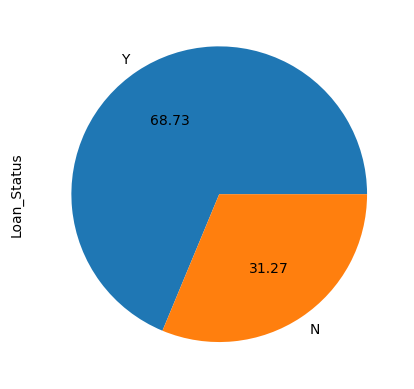

In [77]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%.2f')

# >> Loan Status Y has more count of 68.73% & 31.27% N
# >> So It's imbalanceness in target feature

<AxesSubplot:xlabel='Dependents', ylabel='count'>

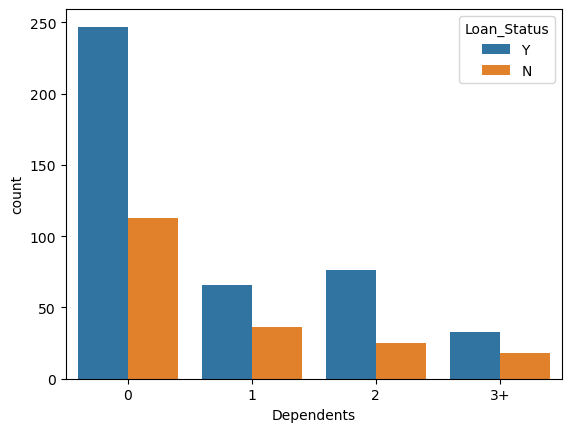

In [78]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')

# >> Our dependent Category is divided into 4 Categories with 0,1,2 & 3+
# >> As our dependent is more count of 0 so we can see more Loan Status Y for 0 dependents

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

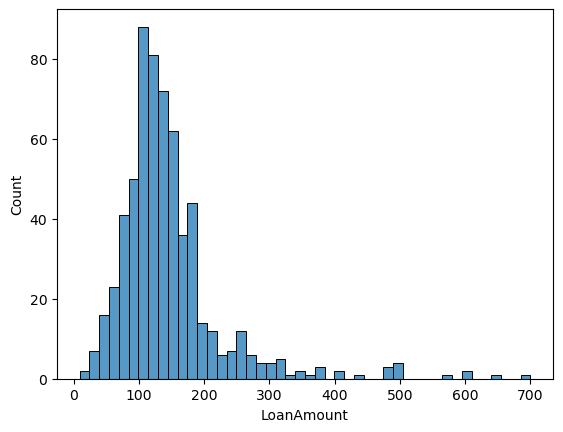

In [79]:
sns.histplot(df['LoanAmount'])

# >> We can see LoanAmount is Distributed more between 0-300
# >> Also we can less distribution of loan amount more than 400

<AxesSubplot:ylabel='Gender'>

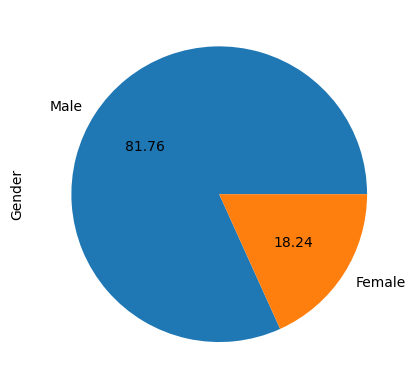

In [80]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')
# >> Also we can see imbalance in dataset for More Gender Male Count as Compared to Feamle

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

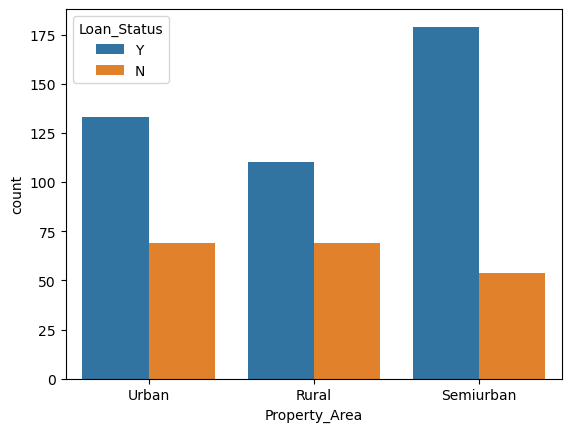

In [81]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

# >> We can see we have more count for Semiurban in Loan Status as Y & aslo less value for N in SemiUrban as Compared to others Property

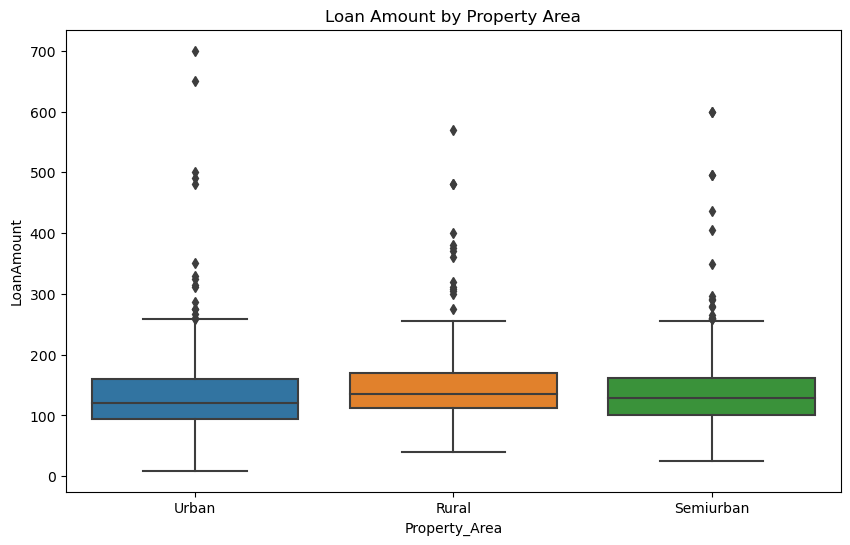

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.title('Loan Amount by Property Area')
plt.show()

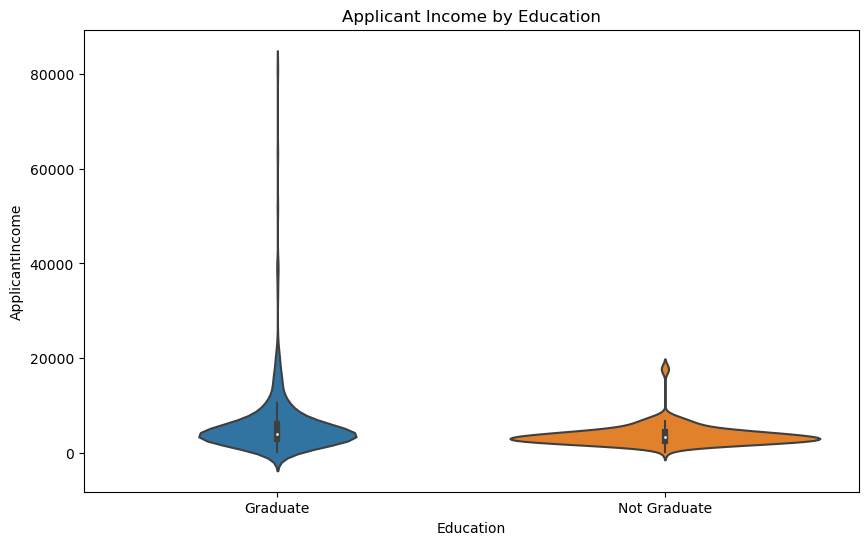

In [83]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Education')
plt.show()


# Graduate Applicants:
#  >> The distribution of incomes for graduates is wider and has a higher peak.
#  >> This indicates greater variance in income levels among graduates.
#  >> Some graduates earn significantly more, leading to the extended upper tail of the distribution.

# Not Graduate Applicants:
# >> The distribution of incomes for non-graduates is narrower and flatter.
# >> There is less variability in income among non-graduates.
# >> The peak is around the lower-income range.

# Summary:
# Graduates exhibit a wider range of income levels, while non-graduates have a more consistent income distribution.
# The graph highlights the impact of education on income disparities.

#**Data Preprocessing**

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [115]:
categorical_vars=df[Categorical_columns[0:6]]

In [116]:
categorical_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         614 non-null    object
 1   Married        614 non-null    object
 2   Dependents     614 non-null    object
 3   Education      614 non-null    object
 4   Self_Employed  614 non-null    object
 5   Property_Area  614 non-null    object
dtypes: object(6)
memory usage: 28.9+ KB


In [117]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical columns >>

# Applying LabelEncoder to each categorical column >>
label_encoders = {}
for column in categorical_vars:
    # Applying labelencoder >>
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [118]:
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [119]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

In [120]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#**Data Splitting**

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [122]:
y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [123]:
#Tackling Imbalance
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [126]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [127]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x1, y1, test_size=0.2, random_state=42)

#**Model Building**

In [128]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [129]:
# Train and evaluate models
for name, model in models.items():
    print("-"*70)
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")
print("-"*70)

----------------------------------------------------------------------
Training and evaluating Logistic Regression...


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.71
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70        94
           1       0.63      0.84      0.72        75

    accuracy                           0.71       169
   macro avg       0.73      0.72      0.71       169
weighted avg       0.74      0.71      0.71       169


----------------------------------------------------------------------
Training and evaluating Random Forest...
Accuracy of Random Forest: 0.79
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        94
           1       0.72      0.87      0.79        75

    accuracy                           0.79       169
   macro avg       0.80      0.80      0.79       169
weighted avg       0.81      0.79      0.79       169


----------------------------------------------------------------------
Train

Based on the evaluation results provided, here's a summary of the models' performance in bullet points:

- Logistic Regression:
  - Accuracy: 0.71
  - Precision (class 0): 0.83
  - Precision (class 1): 0.63
  - Recall (class 0): 0.61
  - Recall (class 1): 0.84
  - F1-score (class 0): 0.70
  - F1-score (class 1): 0.72
  - Comments:
    - Achieves high precision and recall for class 0 (Y).
    - Despite lower recall for class 1 (N), maintains overall decent accuracy.

- Random Forest:
  - Accuracy: 0.79
  - Precision (class 0): 0.87
  - Precision (class 1): 0.72
  - Recall (class 0): 0.73
  - Recall (class 1): 0.87
  - F1-score (class 0): 0.80
  - F1-score (class 1): 0.79
  - Comments:
    - Similar to Logistic Regression, achieves high precision and recall for class 0 (Y).
    - Better accuracy compared to Logistic Regression. Best F1 score for both class 0 and 1.

- Gradient Boosting:
  - Accuracy: 0.79
  - Precision (class 0): 0.93
  - Precision (class 1): 0.69
  - Recall (class 0): 0.67
  - Recall (class 1): 0.93
  - F1-score (class 0): 0.78
  - F1-score (class 1): 0.80
  - Comments:
    - Achieves the highest recall for class 1 (Y).
    - Lower precision and recall for class 0 (N) compared to Random Forest models.

Based on the evaluation metrics and analysis, the recommendation for model selection would be:

- **Random Forest**:
  - It achieves the highest overall accuracy (0.79) among the models evaluated.
  - Despite slightly lower recall for class 0 (N), it balances precision and recall well for both classes.

Thus, considering both accuracy and precision-recall balance, Random Forest appears to be the most suitable model for this dataset.